<a href="https://colab.research.google.com/github/AshishRam7/Fruit-and-Vegetable-Classification---CNN/blob/main/Testing_of_Fruit_and_Vegetable_Classification_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing required libraries:

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

##Connecting to Google Drive:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Loading our Model:

In [5]:
cnn = tf.keras.models.load_model('/content/trained_model_final.h5')

##Performing Prediction on a single image

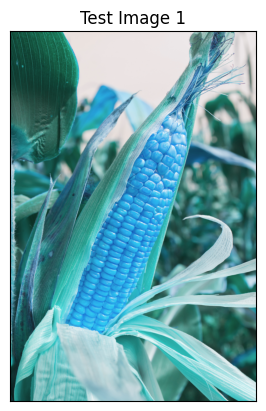

In [7]:
import cv2
image_path = "/content/drive/MyDrive/Fruit_and_Vegetables_Classification/test/corn/Image_2.jpg"
img = cv2.imread(image_path)
plt.imshow(img)
plt.title("Test Image 1")
plt.xticks([])
plt.yticks([])
plt.show()

#Testing Model:

In [8]:
#Preprocessing the input image to match the preprocessing done for the trained and validation images
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(64,64))

#Storing the image in the form of an array
input_arr = tf.keras.preprocessing.image.img_to_array(image)

#Converting an image into a batch
input_arr = np.array([input_arr])

#prediction will hold the probability of the image lying in any of the classes
prediction = cnn.predict(input_arr)

#displays the class-wise predicition probability
print(prediction)


1/1 [==============================] - 0s 406ms/step
[[1.1672094e-11 9.0640394e-12 9.4319413e-24 1.0877117e-15 7.0346837e-13
  2.1063624e-12 2.5880825e-10 2.2168942e-10 9.3039010e-13 1.2362458e-02
  1.6589107e-22 6.7682297e-22 6.8443986e-13 3.1187143e-15 7.6666997e-19
  1.1006413e-17 3.6705647e-17 1.8344432e-08 6.9911438e-13 1.3998360e-12
  1.1401505e-09 8.2412667e-11 6.4760968e-16 6.5477007e-12 3.1794353e-16
  5.3085477e-17 3.7233400e-15 4.8064559e-11 5.3679098e-16 5.0074818e-12
  5.9608054e-16 9.8763752e-01 2.2772104e-10 4.3701752e-17 2.5947237e-15
  4.6899964e-14]]


#Testing set preprocessing:

In [9]:
test_data = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Fruit_and_Vegetables_Classification/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 359 files belonging to 36 classes.


In [11]:
test_data.class_names

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

##Fetching the predicted fruit name:

*   Here we will fetch the index with the maximum probability in the 'prediction' array and find the fruit/vegetable name corresponding to that index in 'test_data.class_name'
*   The name label found in 'test_data.class_name' will give us the predicted fruit/vegetable name.



In [12]:
print(prediction[0])

[1.1672094e-11 9.0640394e-12 9.4319413e-24 1.0877117e-15 7.0346837e-13
 2.1063624e-12 2.5880825e-10 2.2168942e-10 9.3039010e-13 1.2362458e-02
 1.6589107e-22 6.7682297e-22 6.8443986e-13 3.1187143e-15 7.6666997e-19
 1.1006413e-17 3.6705647e-17 1.8344432e-08 6.9911438e-13 1.3998360e-12
 1.1401505e-09 8.2412667e-11 6.4760968e-16 6.5477007e-12 3.1794353e-16
 5.3085477e-17 3.7233400e-15 4.8064559e-11 5.3679098e-16 5.0074818e-12
 5.9608054e-16 9.8763752e-01 2.2772104e-10 4.3701752e-17 2.5947237e-15
 4.6899964e-14]


In [13]:
print(max(prediction[0]))

0.9876375


In [14]:
class_index = np.where(prediction[0] == max(prediction[0]))
print(class_index[0][0])

31


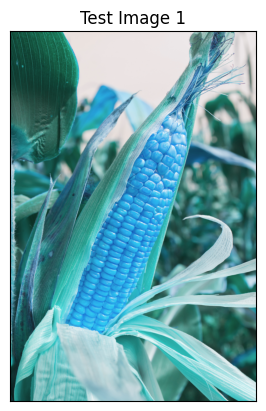

In [15]:
#Displaying the image:
plt.imshow(img)
plt.title("Test Image 1")
plt.xticks([])
plt.yticks([])
plt.show()

In [16]:
#Single Prediction:
predicted_class = test_data.class_names[class_index[0][0]]
vowel = predicted_class[0] not in ['a','e','i','o','u']
print("It is a {}".format(predicted_class)) if vowel else print("It is an {}".format(predicted_class))

It is a sweetcorn
